# Import Packages

In [ ]:
import matplotlib.pyplot as plt
import glob 
import numpy as np
import os
import random
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [108]:
df=pd.read_csv("Depression Student Dataset.csv")
df.head(10)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
5,Male,19,4.0,4.0,5-6 hours,Unhealthy,Yes,1,4,Yes,Yes
6,Female,34,4.0,2.0,More than 8 hours,Moderate,Yes,6,2,No,Yes
7,Female,20,4.0,1.0,More than 8 hours,Healthy,Yes,3,4,Yes,Yes
8,Female,33,1.0,4.0,More than 8 hours,Moderate,No,10,3,No,No
9,Male,33,4.0,3.0,Less than 5 hours,Unhealthy,Yes,10,1,No,Yes


In [109]:
df["Study Hours"].unique()

array([ 9,  7, 10,  4,  1,  6,  3, 11,  2, 12,  8,  0,  5])

In [110]:
df["Sleep Duration"].unique()

array(['7-8 hours', '5-6 hours', 'More than 8 hours', 'Less than 5 hours'],
      dtype=object)

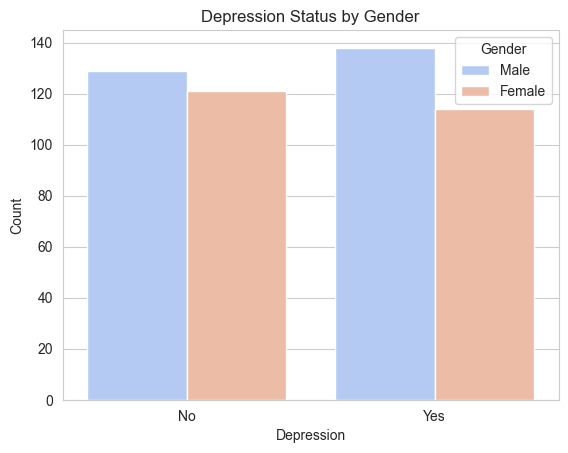

In [111]:
sns.countplot(x='Depression', hue='Gender', data=df, palette='coolwarm')
plt.title('Depression Status by Gender')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

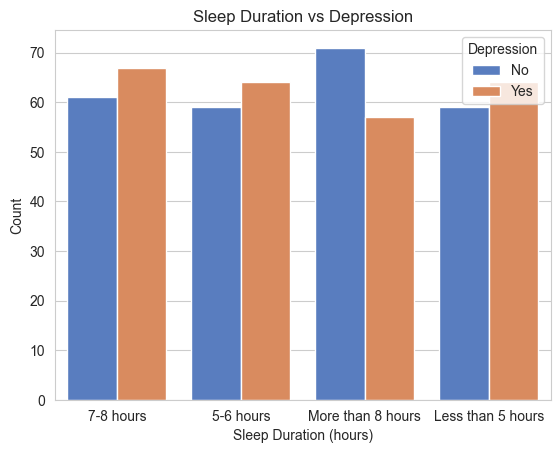

In [112]:
sns.countplot(x='Sleep Duration', hue='Depression', data=df, palette='muted')
plt.title('Sleep Duration vs Depression')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Depression', ylabel='count'>

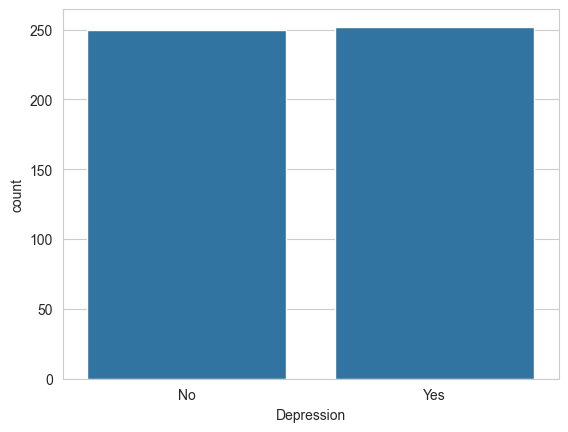

In [113]:
sns.set_style('whitegrid')
sns.countplot(x='Depression',data=df)

In [114]:
print(df.isnull().values.any())

False


# Mapping

In [115]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df["Dietary Habits"]=df["Dietary Habits"].map({"Healthy":0,"Unhealthy":1,"Moderate":2})
df["Have you ever had suicidal thoughts ?"]=df["Have you ever had suicidal thoughts ?"].map({"Yes":1,"No":0})
df["Family History of Mental Illness"]=df["Family History of Mental Illness"].map({"Yes":1,"No":0})
df["Depression"]=df["Depression"].map({"Yes":1,"No":0})
df["Sleep Duration"]=df["Sleep Duration"].map({"Less than 5 hours":0,"5-6 hours":1,"7-8 hours":2,"More than 8 hours":3})

In [116]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,2,2,1,9,2,1,0
1,1,28,4.0,5.0,1,0,1,7,1,1,0
2,1,25,1.0,3.0,1,1,1,10,4,0,1
3,1,23,1.0,4.0,3,1,1,7,2,1,0
4,0,31,1.0,5.0,3,0,1,4,2,1,0


In [117]:
df["Age"]=(df["Age"] - np.min(df["Age"])) / (np.max(df["Age"]) - np.min(df["Age"]))

In [118]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,0.6250,2.0,4.0,2,2,1,9,2,1,0
1,1,0.6250,4.0,5.0,1,0,1,7,1,1,0
2,1,0.4375,1.0,3.0,1,1,1,10,4,0,1
3,1,0.3125,1.0,4.0,3,1,1,7,2,1,0
4,0,0.8125,1.0,5.0,3,0,1,4,2,1,0


In [119]:
df.shape

(502, 11)

# Train/Test split

In [120]:
X = df.drop(columns=["Depression"])
y = df["Depression"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (401, 10)
X_test: (101, 10)
y_train: (401,)
y_test: (101,)


In [151]:
def calculate(y_train,y_test,y_pred_train,y_pred_test):
    acc_train=accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test=accuracy_score(y_true=y_test,y_pred=y_pred_test)
    p=precision_score(y_true=y_test,y_pred=y_pred_test,average="weighted")
    r=recall_score(y_true=y_test,y_pred=y_pred_test,average="weighted")

    print(f"acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}")
    return acc_train,acc_test,p,r

## KNN

In [152]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [153]:
y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)
acc_train_knn,acc_test_knn,p_knn,r_knn=calculate(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.8503740648379052 - acc test: 0.8217821782178217 - precision: 0.8273997612527211 - recall: 0.8217821782178217


## LogisticRegression

In [149]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [150]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)
acc_train_lr,acc_test_lr,p_lr,r_lr=calculate(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.9600997506234414 - acc test: 0.9504950495049505 - precision: 0.951956624233852 - recall: 0.9504950495049505


## Random Forest

In [147]:
rf = RandomForestClassifier(max_depth=30, random_state=0,n_estimators=200,min_samples_split=2,min_samples_leaf=1,criterion="gini")
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)

In [148]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)
acc_train_rf,acc_test_rf,p_rf,r_rf=calculate(y_train,y_test,y_pred_train,y_pred_test)

acc train: 1.0 - acc test: 0.9603960396039604 - precision: 0.9631752648949107 - recall: 0.9603960396039604


# Comparison

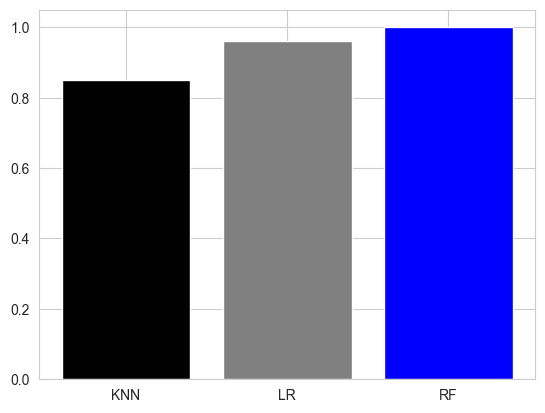

In [155]:
acc_train=[acc_train_knn,acc_train_lr,acc_train_rf]
title=["KNN","LR","RF"]
colors=["black","gray","blue"]
plt.bar(title,acc_train,color=colors)
plt.show()

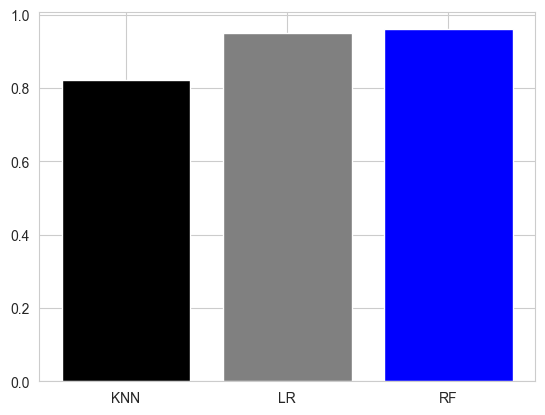

In [157]:
acc_test=[acc_test_knn,acc_test_lr,acc_test_rf]
title=["KNN","LR","RF"]
colors=["black","gray","blue"]
plt.bar(title,acc_test,color=colors)
plt.show()